# berryBoxImager

Code to process images taken in a controlled lightbox setting. These images will be used to measure phenotypic information on berries, including size, shape, and color.

Steps in the berry box imaging pipeline:
+ **Process images**
+ Measure phenotypes


## Process images

The image processing steps will include i) reading QR codes to determine the sample name and ii) color correction using a color card.


## User input

Edit the following:

**image_directory**: full path to the folder that contains the berry box images.  
**session_name**: name of the imaging session. e.g. "2021_field_berry_quality"  
**color_correction_standard**: full path to the color correction standard image.  
**output_directory**: full path to folder where output data and files should go.


In [38]:
# Edit the following inputs
image_directory = "C:/Users/jeffrey.neyhart/OneDrive - USDA/Documents/CranberryLab/Breeding/2021/Quality/BerryBoxImaging/RawImages1"
session_name = "2021_field_berry_quality"
color_correction_standard = ""
output_directory = "C:/Users/jeffrey.neyhart/OneDrive - USDA/Documents/CranberryLab/Breeding/2021/Quality/BerryBoxImaging/"

## Pipeline setup

Load packages, set directories, etc.

**Do not alter this or any code below**

In [72]:
# Load packages
import cv2 as cv
import imageio
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
from plantcv import plantcv as pcv
import shutil

# List all input images
all_images = os.listdir(image_directory)
# Add the directory name to the image file name
all_images = [os.path.join(image_directory, x) for x in all_images if ".JPG" in x.upper()]

# # Read in the color checker standard and convert to a matrix
# color_checker_standards_file = os.path.join(proj_dir, '../resources\\colorchecker_classicMini_bgr.csv')
# color_std_recarray = np.recfromcsv(color_checker_standards_file)
# target_matrix = color_std_recarray.astype([('square', '<f8'), ('blue', '<f8'), ('green', '<f8'), ('red', '<f8')]).view(np.ndarray)

# Create an object of class QRCodeDetector
qrCodeDetector = cv.QRCodeDetector()

# Open up a text file to store photo name and collection id
image_collection_filename = os.path.join(output_directory, session_name + "_image_collectionID_link.txt")
handle = open(image_collection_filename, "w")
# Add a header
handle.write("\t".join(["image_filename", "collection_id"]) + "\n")


29

## Run the pipeline



### Step 0: Re-orient images

Some images are in portrait mode. We need to orient them to landscape.

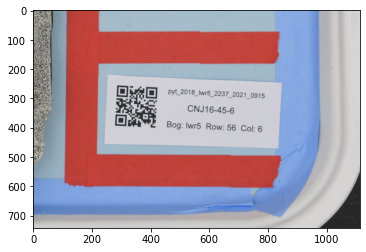

File DSC_0264.JPG (pyt_2018_lwr5_2237_2021_0915) has been processed.



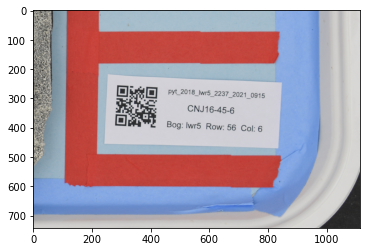

File DSC_0265.JPG (pyt_2018_lwr5_2237_2021_0915) has been processed.



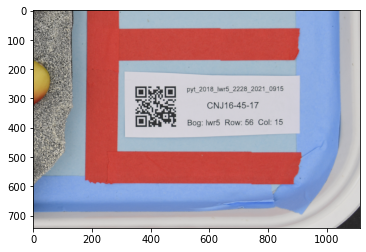

File DSC_0266.JPG (pyt_2018_lwr5_2228_2021_0915) has been processed.



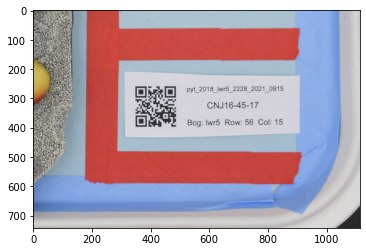

File DSC_0267.JPG (pyt_2018_lwr5_2228_2021_0915) has been processed.



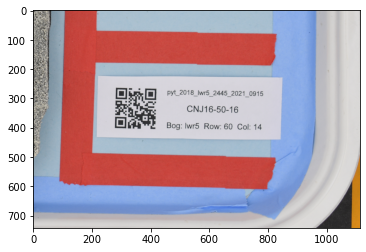

File DSC_0287.JPG (pyt_2018_lwr5_2445_2021_0915) has been processed.



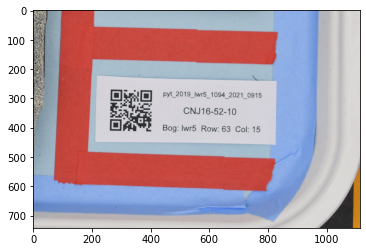

File DSC_0423.JPG (pyt_2019_lwr5_1094_2021_0915) has been processed.



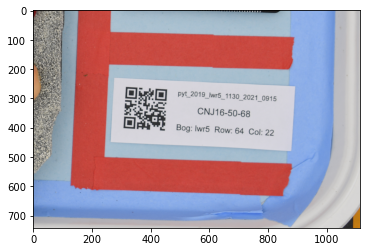

File DSC_0426.JPG (pyt_2019_lwr5_1130_2021_0915) has been processed.



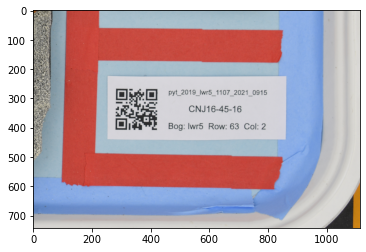

File DSC_0431.JPG (pyt_2019_lwr5_1107_2021_0915) has been processed.



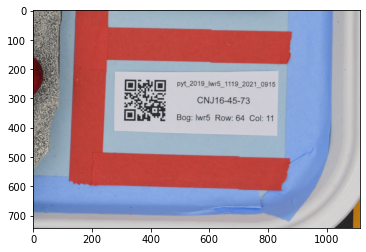

File DSC_0432.JPG (pyt_2019_lwr5_1119_2021_0915) has been processed.



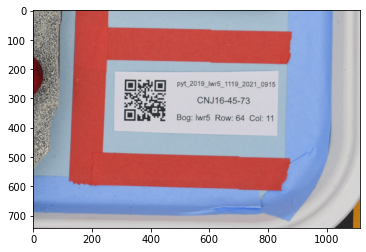

File DSC_0433.JPG (pyt_2019_lwr5_1119_2021_0915) has been processed.



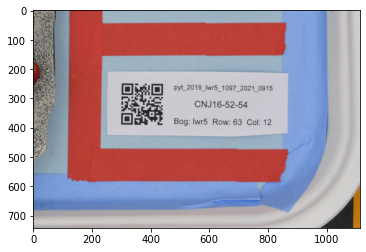

File DSC_0434.JPG (pyt_2019_lwr5_1097_2021_0915) has been processed.



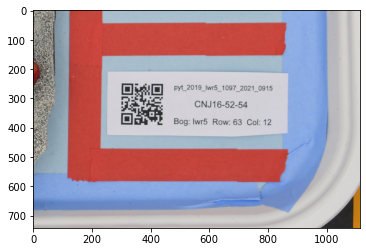

File DSC_0435.JPG (pyt_2019_lwr5_1097_2021_0915) has been processed.



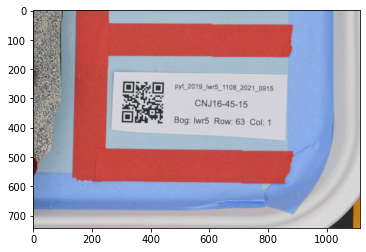

File DSC_0436.JPG (pyt_2019_lwr5_1108_2021_0915) has been processed.



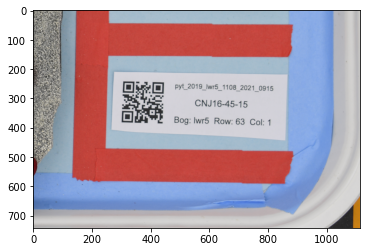

File DSC_0437.JPG (pyt_2019_lwr5_1108_2021_0915) has been processed.



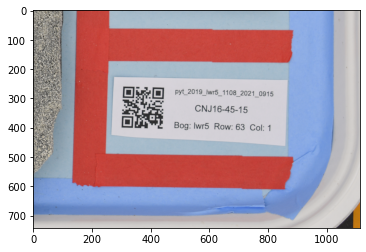

File DSC_0438.JPG (pyt_2019_lwr5_1108_2021_0915) has been processed.



In [73]:
# # Example image
# img_file = os.path.join(image_directory, "DSC_0431.JPG")

## Loop over all images
for img_file in all_images[0:15]:

    ### Step -1: read in the image
    img1 = imageio.imread(img_file)

    ### Step 0: Re-orient images

    # Some images are in portrait mode. We need to orient them to landscape.

    ## Re-orient the image

    # Get the image dimensions
    h, w, d = img1.shape

    # Determine if the image is in portrait or landscape orientation
    # If h > w, it is a portrait; if not, it is a landscape
    if h > w:
        # Get the halfway point of ROWS
        h_half = int(h / 2)

        # If is_portrait is true, correct the orientation
        redRowMeans = np.ndarray.mean(img1[:,:,0], 1)
        blueRowMeans = np.ndarray.mean(img1[:,:,2], 1)

        redMinusBlue = redRowMeans - blueRowMeans

        # Get the 99th quantile of red minus blue; this should be the red tape
        threshold = np.quantile(redMinusBlue, q = 0.99)

        # Which rows are above that threshold
        which_rows_above_threshold = [i for i, x in enumerate(redMinusBlue >= threshold) if x]
        red_tape_middle = int(np.median(which_rows_above_threshold))

        # Is the red tape above or below the halfway point?
        if red_tape_middle > h_half:
            # Rotate!
            img2 = cv.rotate(img1, cv.ROTATE_90_COUNTERCLOCKWISE)

        else:
            img2 = cv.rotate(img1, cv.ROTATE_90_CLOCKWISE)

    # Else it is landscape
    else:
        
#         # Print the whole image
#         plt.figure()
#         plt.imshow(img1)
#         plt.show()
        
        # Get the halfway point of COLUMNS
        w_half = int(w / 2)

        # If is_portrait is true, correct the orientation
        redColMeans = np.ndarray.mean(img1[:,:,0], 0)
        blueColMeans = np.ndarray.mean(img1[:,:,2], 0)

        redMinusBlue = redColMeans - blueColMeans
        
#         plt.plot(redMinusBlue)
#         plt.show()

        # Get the 99th quantile of red minus blue; this should be the red tape
        threshold = np.quantile(redMinusBlue, q = 0.99)

        # Which rows are above that threshold
        which_cols_above_threshold = [i for i, x in enumerate(redMinusBlue >= threshold) if x]
        red_tape_middle = int(np.median(which_cols_above_threshold))

        # Is the red tape on the left side or right side?
        if red_tape_middle > w_half:
            img2 = img1

        else:
            # Rotate!
            img2 = cv.rotate(img1, cv.ROTATE_180)

    ### Step 1: Parse the QR code.

    # Crop the image to speed detection

    # Get the dimensions again (for rotate images)
    h, w, d = img2.shape

    # Get the pixels of the lower-right quadrant
    lr_h = int(0.6 * h)
    lr_w = int(0.6 * w)

    # Crop and resize the image
    img2_crop = pcv.transform.resize_factor(img2[lr_h:h, lr_w:w,:], (0.5, 0.5))

    # Print the image
    plt.figure()
    plt.imshow(img2_crop)
    plt.show()

    # Detect and decode the QR code
    collection_id, points, _ = qrCodeDetector.detectAndDecode(img2_crop)

    # Write the collection ID and original filename to the handle
    handle.write("\t".join([os.path.basename(img_file), collection_id]) + "\n")
    
    # Print a message
    print("File " + os.path.basename(img_file) + " (" + collection_id + ") has been processed.\n")

# Close the file
handle.close()



In [74]:

handle.close()

### Step 1: QR code reader

This step finds and decodes the QR code in the images

In [19]:
# Check progress
plt.figure()
plt.imshow(img2)
plt.show()


'ab'

In [26]:

# Crop the image to speed detection

# Get the dimensions again (for rotate images)
h, w, d = img2.shape

# Get the pixels of the lower-right quadrant
lr_h = int(0.6 * h)
lr_w = int(0.6 * w)

# Crop and resize the image
img2_crop = pcv.transform.resize_factor(img2[lr_h:h, lr_w:w,:], (0.5, 0.5))

# # Print the image
# plt.figure()
# plt.imshow(img2_crop)
# plt.show()

# Detect and decode the QR code
collection_id, points, _ = qrCodeDetector.detectAndDecode(img2_crop)

# Write the collection ID and original filename to the handle
handle.write("\t".join([os.path.basename(file1), collection_id]) + "\n")


42

In [10]:
## Put it all together - loop over files

for file in example_images:
    
    # Add full file path
    file1 = os.path.join(example_image_dir, file)
    # Record the current time
    now = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Read in the image
    img1 = imageio.imread(file1)
    
    # Crop the image to speed detection

    # Dimensions
    img1_h, img1_w, img1_d = img1.shape
    # Get the pixels of the lower-right quadrant
    lr_h = int(0.5 * img1_h)
    lr_w = int(0.5 * img1_w)

    # img1_crop = img1[lr_h:img1_h, lr_w:img1_w,:]

    # Crop and resize the image
    img1_crop = pcv.transform.resize_factor(img1[lr_h:img1_h, lr_w:img1_w,:], (0.5, 0.5))

    # # Print the image
    # plt.figure()
    # plt.imshow(img1_crop)
    # plt.show()

    # Detect and decode the QR code
    decodedText, points, _ = qrCodeDetector.detectAndDecode(img1_crop)
    
    ## Copy and rename the image
    # Create a new filename using the decodedText and the date
#     file1_rename = decodedText + "_" + now + ".jpg"
    # Create a new filename using the decodedText and the original name
    base1 = os.path.basename(file1).upper().replace(".JPG", "")
    file1_rename = decodedText + "_" + base1 + ".jpg"

    # Copy the file
    shutil.copyfile(src = file1, dst = os.path.join(renamed_image_dir, file1_rename))
    # Message
    print("File: " + os.path.basename(file1) + " has been copied to " + file1_rename + ".")
    



File: DSC_0264.JPG has been copied to pyt_2018_lwr5_2237_2021_0915_DSC_0264.jpg.
File: DSC_0267.JPG has been copied to pyt_2018_lwr5_2228_2021_0915_DSC_0267.jpg.
File: DSC_0274.JPG has been copied to pyt_2018_lwr5_2230_2021_0915_DSC_0274.jpg.
File: DSC_0277.JPG has been copied to pyt_2018_lwr5_2241_2021_0915_DSC_0277.jpg.
File: DSC_0281.JPG has been copied to pyt_2018_lwr5_2226_2021_0915_DSC_0281.jpg.


### Step 2: Color Calibration

This step performs color calibration of the images

SKIP THIS FOR NOW

In [100]:
# Use the plant CV Color Correction Workflow

# Add full file path
file1 = os.path.join(example_image_dir, example_images[0])
# Print the basename
print(os.path.basename(file1))

# Read in the image
img1 = imageio.imread(file1)

# plt.imshow(img1)
# plt.show()

# # Resize the image
# img1_resize = pcv.transform.resize_factor(img1, (0.5, 0.5))

# Find the color card in the image
dataframe1, start, space = pcv.transform.find_color_card(rgb_img = img1)
# Rescale the spacing
print(start)

# Use these outputs to create a labeled color card mask
mask = pcv.transform.create_color_card_mask(rgb_img = img1, radius = 5, start_coord = start, spacing = space, 
                                            ncols = 4, nrows = 6)


DSC_0235.JPG
(3956, 854)


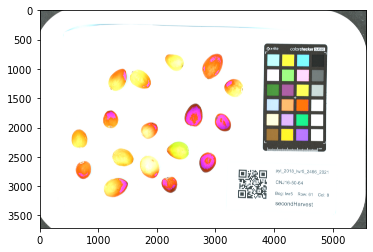

In [120]:
# Get the RGB matrix for the colors of the colorChecker in this image
headers, source_matrix = pcv.transform.get_color_matrix(img1, mask)

# print(source_matrix)
# print(target_matrix)

# Calculate a transformation matrix between the target matrix and this source matrix
matrix_a, matrix_m, matrix_b = pcv.transform.get_matrix_m(target_matrix = target_matrix, source_matrix = source_matrix)
deviance, transformation_matrix = pcv.transform.calc_transformation_matrix(matrix_m, matrix_b)


# Apply the transformation matrix
corrected_img = pcv.transform.apply_transformation_matrix(source_img = img1, target_img = img1,
                                                          transformation_matrix= transformation_matrix) #apply transformation
plt.imshow(corrected_img)
plt.show()



In [121]:
# Save the image
file1_new = file1.replace(".JPG", "_corrected.JPG")
imageio.imsave(file1_new, corrected_img)

In [8]:








# # Calculate a transformation matrix between the target matrix and this source matrix
# matrix_a, matrix_m, matrix_b = pcv.transform.get_matrix_m(target_matrix = target_matrix, source_matrix = source_matrix)
# deviance, transformation_matrix = pcv.transform.calc_transformation_matrix(matrix_m, matrix_b)


# # Apply the transformation matrix
# corrected_img = pcv.transform.apply_transformation_matrix(source_img = img, target_img = img,
#                                                           transformation_matrix= transformation_matrix) #apply transformation


# plt.imshow(corrected_img)
# plt.show()



# # Read in the chart template
# template_img, template_path, template_filename = pcv.readimage(filename = chart_template_file)

# # Create a labeled color card mask, first use color card finder function 

# # This won't print anything out but you can look at the dataframe output 
# # to see the chips that the function found. 

# # Inputs:
# #   rgb_img - RGB image data containing color card 
# #   threshold - Optional threshold method; either 'adaptgauss' (default), 'normal', or 'otsu'
# #   threshvalue - Optional threhsolding value (default threshvalue = 125) 
# #   blurry - Optional boolean; False (default) or if True then image sharpening is applied 
# #   background - Optional type of image background; 'dark' (default) or 'light'
# dataframe1, start, space = pcv.transform.find_color_card(rgb_img=template_img)

# # Make the labeled mask of the target image 

# # Inputs: 
# #   rgb_img - RGB image data containing color card 
# #   radius - Radius of color card chips (masks make circles on chips)
# #   start_coord - Two-element tuple of the first chip mask, (starting x, starting y) 
# #   spacing - Two-element tuple of the horizontal and vertical spacing between chip masks
# #   nrows - Number of chip rows
# #   ncols - Number of chip columns 
# #   exclude - Optional list of chips to exclude. List largest to smallest index 
# target_mask = pcv.transform.create_color_card_mask(template_img, radius=10, start_coord=start, 
#                                                    spacing=space, nrows=6, ncols=4)





### Step 3: Segmentation of berries

This step crops the photo and identifies the berries

C:\Users\jeffrey.neyhart\OneDrive - USDA\Documents\CranberryLab\Phenomics\BerryBoxImageAnalysis\berryBoxImagePipeline\scripts\../testPhotos\testPhotosRename\pyt_2018_lwr5_2230_2021_0915_DSC_0274.jpg
(3712, 5568, 3)
(1856, 2784, 3)


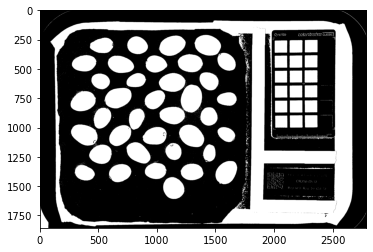

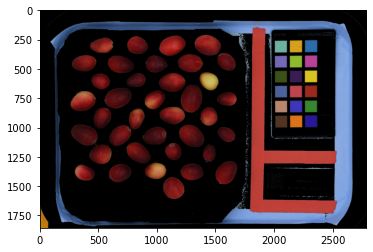

(1856, 2784, 3)


In [14]:
# List the renamed images
image_list1 = os.listdir(renamed_image_dir)
image_list1 = [os.path.join(renamed_image_dir, x) for x in image_list1]
image_list1 = [x for x in image_list1 if "berryMask" not in x]

# Read in the first image
file1 = image_list1[2]
print(file1)

# Read in the image
img1 = imageio.imread(file1)
print(img1.shape)

# Downsize
img2 = pcv.transform.resize_factor(img1, factors = (0.5, 0.5))
# img2 = img1

# # Print the image
# plt.figure()
# plt.imshow(img2)
# plt.show()

print(img2.shape)

# Classify
pdf_file = os.path.join(resources_dir, "bayes_classifier/bayes_classified_pdf.out")
mask = pcv.naive_bayes_classifier(rgb_img = img2, pdf_file = pdf_file)

# Print the image
plt.figure()
plt.imshow(mask["berry"], cmap = "gray")
plt.show()


berry_img = pcv.apply_mask(mask=(mask['berry']), img=img2, mask_color='black')

# Upsize
img3 = pcv.transform.resize(berry_img, size = (img1.shape[1], img1.shape[0]))
img3 = berry_img

# Print the image
plt.figure()
plt.imshow(img3)
plt.show()

print(img3.shape)

# Save
imageio.imsave(file1.replace(".jpg", "_berryMask.jpg"), img3)